In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Решение домашнего задания к уроку 1. Основы обучения нейронных сетей

### Задание:
#### Используя файл Web1.ipynb (он в полезных ссылках):

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

2. Проведите анализ — что приводит к ухудшению точности нейронной сети?

3. Что приводит к увеличению ее точности?

(1797, 64)


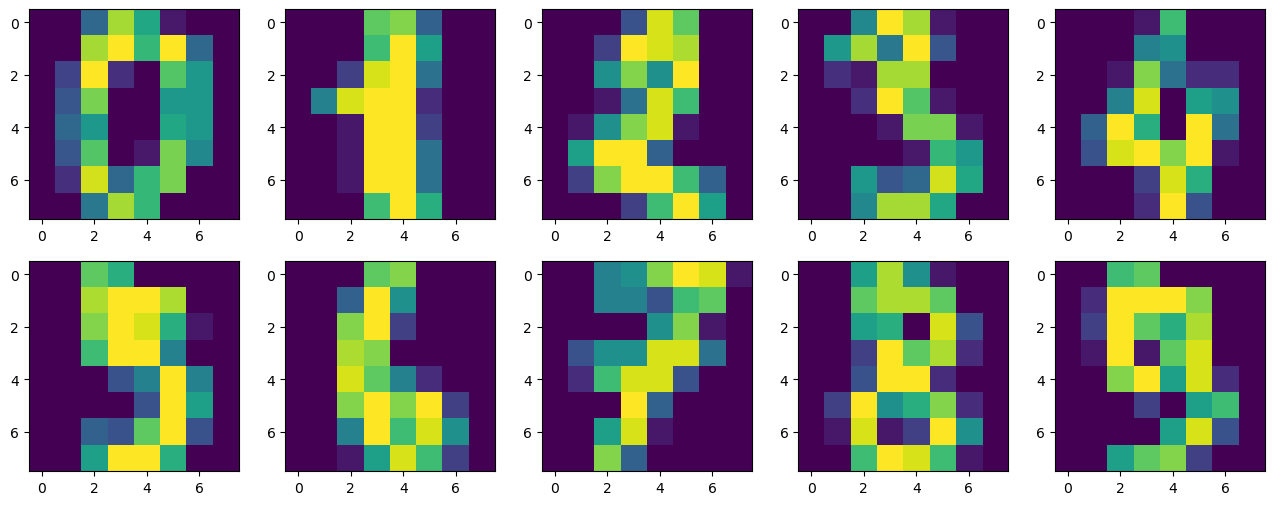

In [2]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [6]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [8]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [9]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(0)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    #  с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)
    
    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate
    
    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    
    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

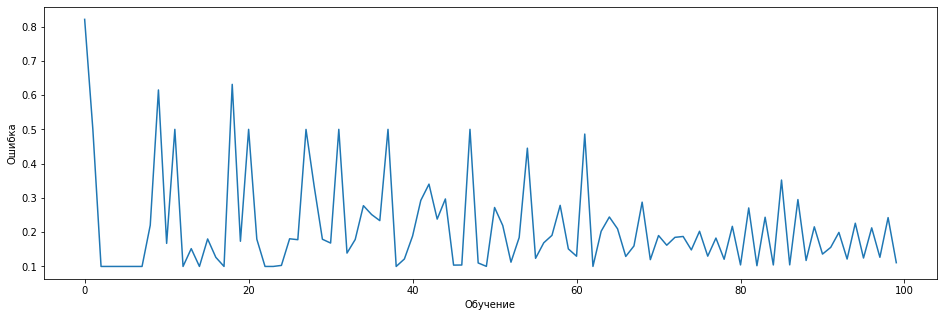

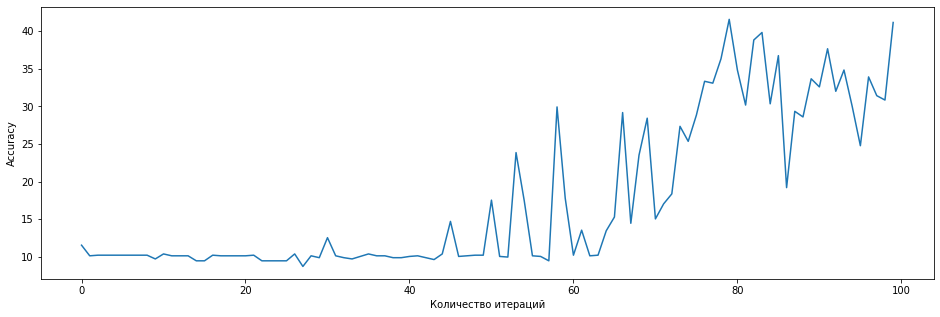

In [ ]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [10]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

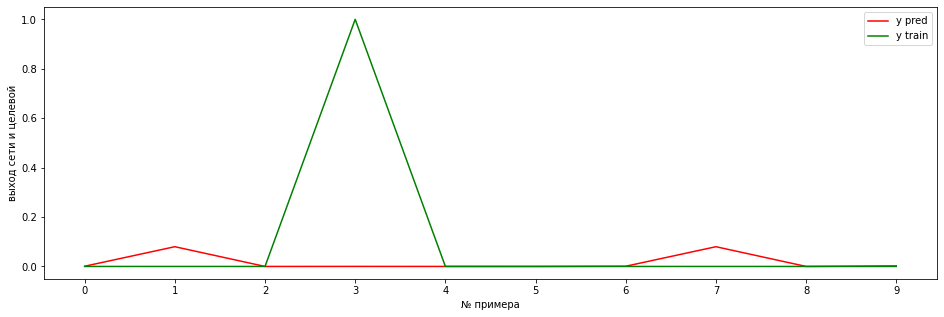

accuracy на обучении 41.15%


In [ ]:
N = 10
label = 1
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

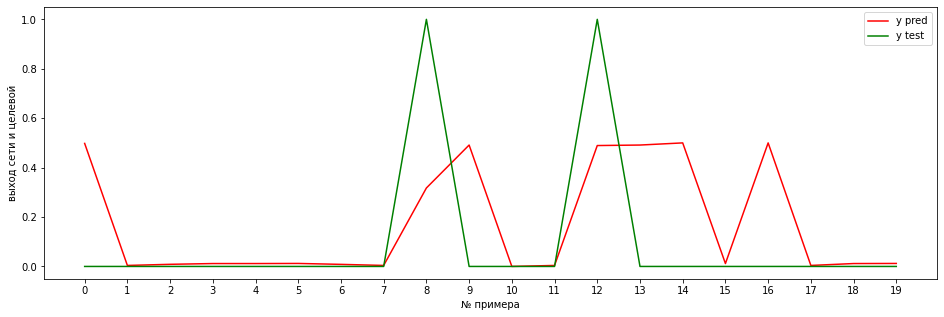

accuracy на тесте 42.42%


In [ ]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

In [19]:
def train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.1, 
             num_epochs=100, 
             check_param='', 
             min_value=1, 
             max_value=10, 
             step=1):
    
    if check_param == 'neuron_numb':
        neuron_numb = np.arange(min_value, max_value+step, step)
    else:
        neuron_numb = neuron_numb

    if check_param == 'learning_rate':
        learning_rate = np.arange(min_value, max_value+step, step)
    else:
        learning_rate = learning_rate

    if check_param == 'num_epochs':
        num_epochs = np.arange(min_value, max_value+step, step)
    else:
        num_epochs = num_epochs

    results = pd.DataFrame()
    params = []
    vals = []
    last_errs = []
    
    parameter = ''
    if check_param == 'neuron_numb':
        parameter = neuron_numb
    elif check_param == 'learning_rate':
        parameter = learning_rate
    elif check_param == 'num_epochs':
        parameter = num_epochs
        
    for val in parameter:
        
        if check_param == 'neuron_numb':
            neuron_numb = val
        elif check_param == 'learning_rate':
            learning_rate = val
        elif check_param == 'num_epochs':
            num_epochs = val
        
        params.append(check_param)
        vals.append(val)
    
        errors = []
        
        np.random.seed(0)
        w0 = np.random.random((64, neuron_numb))  
        w1 = np.random.random((neuron_numb, 10))  

        for i in range(num_epochs):

            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            layer2_error = layer2 - y_train  
            layer2_grad = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_grad.dot(w1.T)
            layer1_grad = layer1_error * sigmoid_deriv(layer1)

            w1 -= layer1.T.dot(layer2_grad) * learning_rate
            w0 -= layer0.T.dot(layer1_grad) * learning_rate

            error = np.mean(np.abs(layer2_error))
            errors.append(error)
        last_errs.append(errors[-1])
        
    results['param'] = params
    results['val'] = vals
    results['last_error'] = last_errs
        
    return results

In [20]:
%%time
res_neuron_numb = train_nn(X_train, y_train, 
             neuron_numb=5, 
             learning_rate=0.01, 
             num_epochs=100, 
             check_param='neuron_numb', 
             min_value=1, 
             max_value=20, 
             step=1)

CPU times: total: 11.6 s
Wall time: 6.3 s


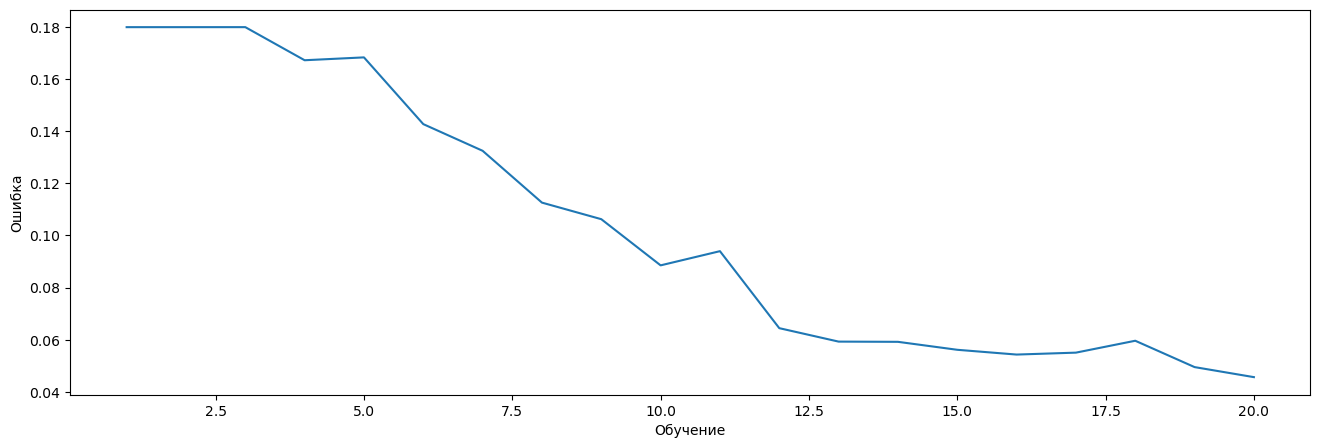

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(res_neuron_numb['val'],res_neuron_numb['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

Качество улучшается с увеличением количества нейронов скрытого слоя , начиная с 20-ти увеличение нейронов не имеет смысла 

In [22]:
%%time
res_learning_rate = train_nn(X_train, y_train, 
             neuron_numb=49, 
             learning_rate=0.01, 
             num_epochs=100, 
             check_param='learning_rate', 
             min_value=0.001, 
             max_value=0.5, 
             step=0.005)

CPU times: total: 2min 17s
Wall time: 1min 24s


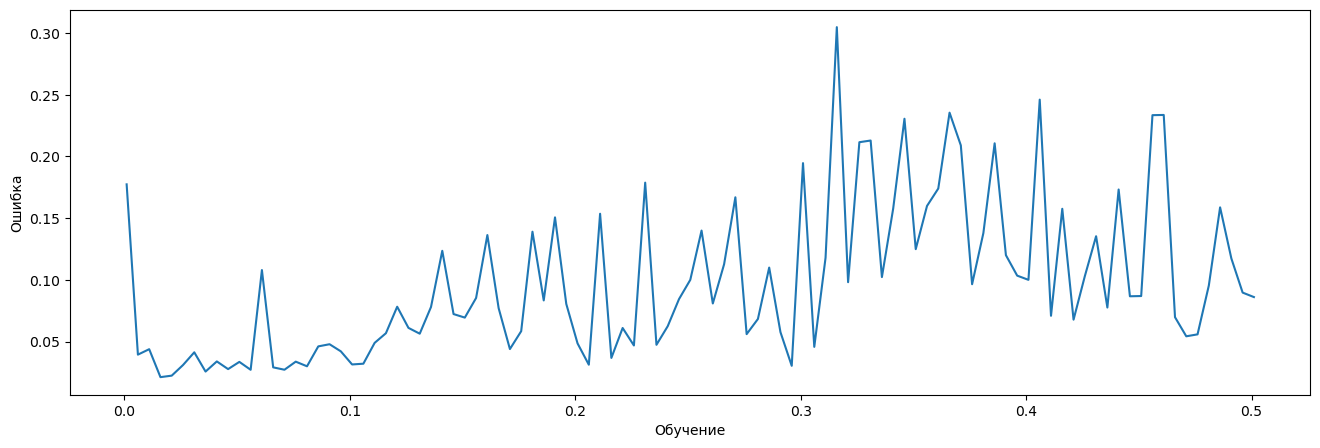

In [23]:
plt.figure(figsize=(16, 5))
plt.plot(res_learning_rate['val'],res_learning_rate['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

по шагу обучения сложно сказать , наиболее оптимальный вариант между до 0.1

In [25]:
%%time
res_num_epochs = train_nn(X_train, y_train, 
             neuron_numb=49, 
             learning_rate=0.016, 
             num_epochs=200, 
             check_param='num_epochs', 
             min_value=50, 
             max_value=1000, 
             step=100)

CPU times: total: 1min 29s
Wall time: 1min 1s


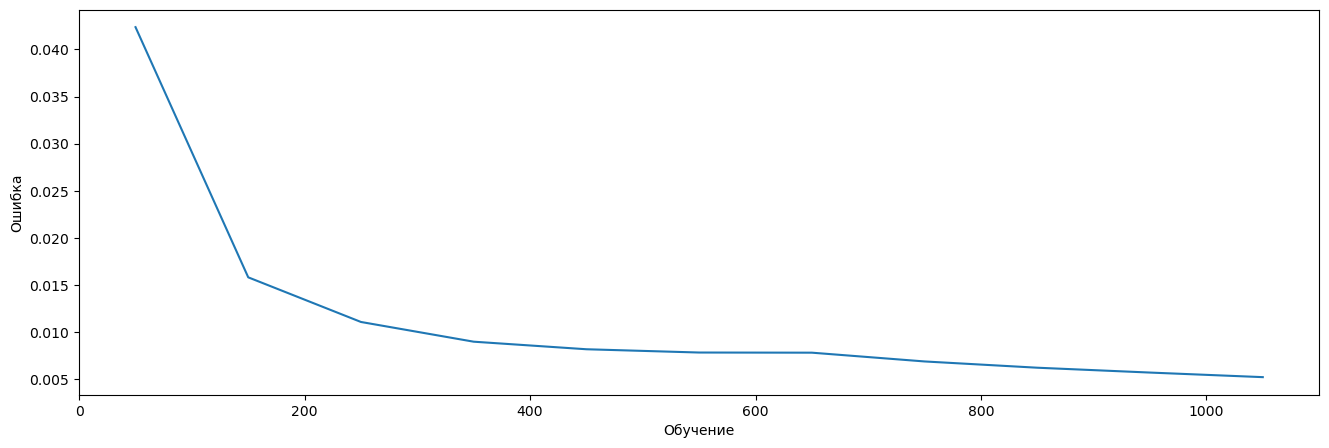

In [26]:
plt.figure(figsize=(16, 5))
plt.plot(res_num_epochs['val'],res_num_epochs['last_error'])
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

оптимальное количество итераций при обучении чуть больше 1000 

Выводы: 
1. При увеличении числа нейронов скрытого слоя качество возрастает, так как точнее проходит переобучение
2. При увеличении скорости обучения качество ухудшается, так как он пробегает мимо минимума 
3. При увеличении количества итераций качество возрастает.